In [2]:
from grid_generator_latest import generate_grid, create_crossword_grid, add_black_squares, returnJSON, create_crossword_image

#### Testing generator-grid with grid nums from Ujjwal

In [3]:
grid_size = 11
max_iters = 600
b_factor = 6

rows = cols = grid_size
no_ran_iters = max_iters

if grid_size != 4:
    while no_ran_iters == max_iters:
        crossword_grid = create_crossword_grid(rows, cols)
        crossword_grid, no_ran_iters, symmetry = add_black_squares(crossword_grid, max_iters, black_factor = b_factor)
else:
    crossword_grid = create_crossword_grid(rows, cols)
    crossword_grid, no_ran_iters, symmetry = add_black_squares(crossword_grid, max_iters, black_factor = b_factor)

In [7]:
json_data = returnJSON(crossword_grid, rows, cols)
grid_nums = json_data['gridnums']
across_nums = json_data['across_nums']
down_nums = json_data['down_nums']

### Working around with the British-Style Crosswords

In [11]:
import puz
import glob
import os
import random

puz_dir_path = './British-Style Crosswords Puz'

puz_filepath_list = glob.glob(os.path.join(puz_dir_path, '*.puz'))

In [14]:
selected_puz_filepath = random.choice(puz_filepath_list)

In [13]:
# convert puz to json file format
def puz_to_json(fname):
    p = puz.read(fname)
    numbering = p.clue_numbering()

    grid = [[None for _ in range(p.width)] for _ in range(p.height)]
    for row_idx in range(p.height):
        cell = row_idx * p.width
        row_solution = p.solution[cell:cell + p.width]
        for col_index, item in enumerate(row_solution):
            if p.solution[cell + col_index:cell + col_index + 1] == '.':
                grid[row_idx][col_index] = 'BLACK'
            else:
                grid[row_idx][col_index] = ["", row_solution[col_index: col_index + 1]]

    across_clues = {}
    for clue in numbering.across:
        answer = ''.join(p.solution[clue['cell'] + i] for i in range(clue['len']))
        across_clues[str(clue['num'])] = [clue['clue'] + ' ', ' ' + answer]
        grid[int(clue['cell'] / p.width)][clue['cell'] % p.width][0] = str(clue['num'])

    down_clues = {}
    for clue in numbering.down:
        answer = ''.join(p.solution[clue['cell'] + i * numbering.width] for i in range(clue['len']))
        down_clues[str(clue['num'])] = [clue['clue'] + ' ', ' ' + answer]
        grid[int(clue['cell'] / p.width)][clue['cell'] % p.width][0] = str(clue['num'])


    mydict = {'metadata': {'date': None, 'rows': p.height, 'cols': p.width}, 'clues': {'across': across_clues, 'down': down_clues}, 'grid': grid}
    return mydict

In [16]:
grid_json_data = puz_to_json(selected_puz_filepath)

In [18]:
rows, cols = grid_json_data['metadata']['rows'], grid_json_data['metadata']['cols']
ori_grid_ = grid_json_data['grid']

grid_structure = []
for i in range(rows):
    row = []
    for j in range(cols):
        if isinstance(ori_grid_[i][j], list):
            row.append(' ')
        else:
            row.append('.')
    grid_structure.append(row)
grid_structure

[[' ', ' ', ' ', ' ', '.', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', '.', ' ', '.', ' ', '.', ' ', '.', ' ', '.', ' ', '.', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', '.', ' ', ' ', ' ', ' ', ' '],
 [' ', '.', ' ', '.', ' ', '.', ' ', '.', ' ', '.', ' ', '.', ' '],
 [' ', ' ', ' ', ' ', ' ', '.', ' ', ' ', ' ', ' ', ' ', ' ', '.'],
 [' ', '.', '.', '.', ' ', '.', ' ', '.', '.', '.', ' ', '.', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', '.', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', '.', ' ', '.', '.', '.', ' ', '.', ' ', '.', '.', '.', ' '],
 ['.', ' ', ' ', ' ', ' ', ' ', ' ', '.', ' ', ' ', ' ', ' ', ' '],
 [' ', '.', ' ', '.', ' ', '.', ' ', '.', ' ', '.', ' ', '.', ' '],
 [' ', ' ', ' ', ' ', ' ', '.', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', '.', ' ', '.', ' ', '.', ' ', '.', ' ', '.', ' ', '.', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '.', ' ', ' ', ' ', ' ']]

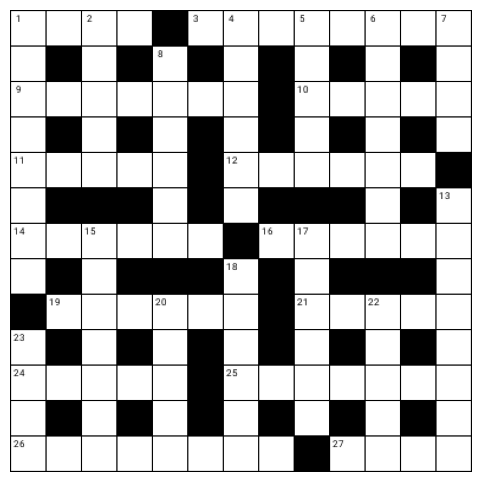

In [20]:
formatted_grid_json = returnJSON(grid_structure, rows, cols)
grid_nums = formatted_grid_json['gridnums']
reshaped_grid = [grid_nums[i:i+rows] for i in range(0, len(grid_nums), rows)]

create_crossword_image(grid_structure, reshaped_grid)